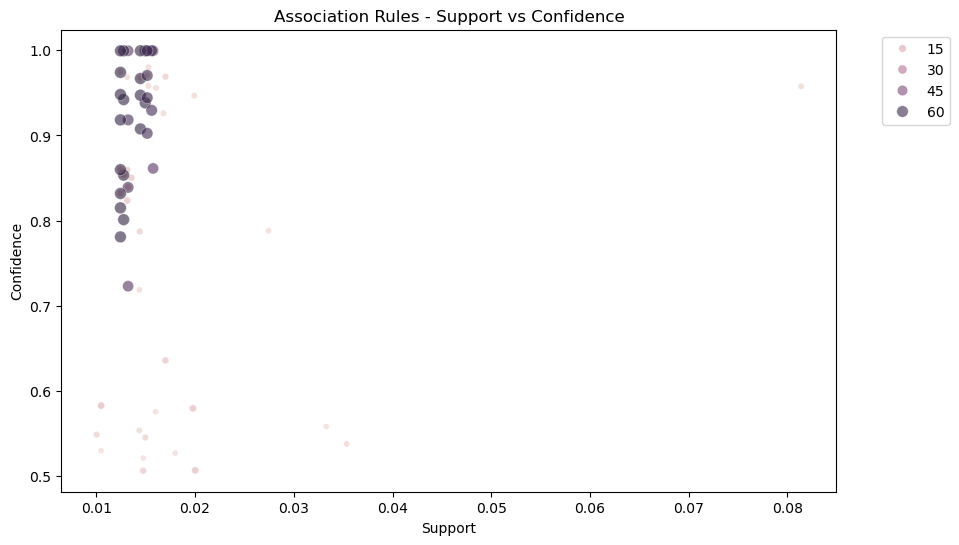

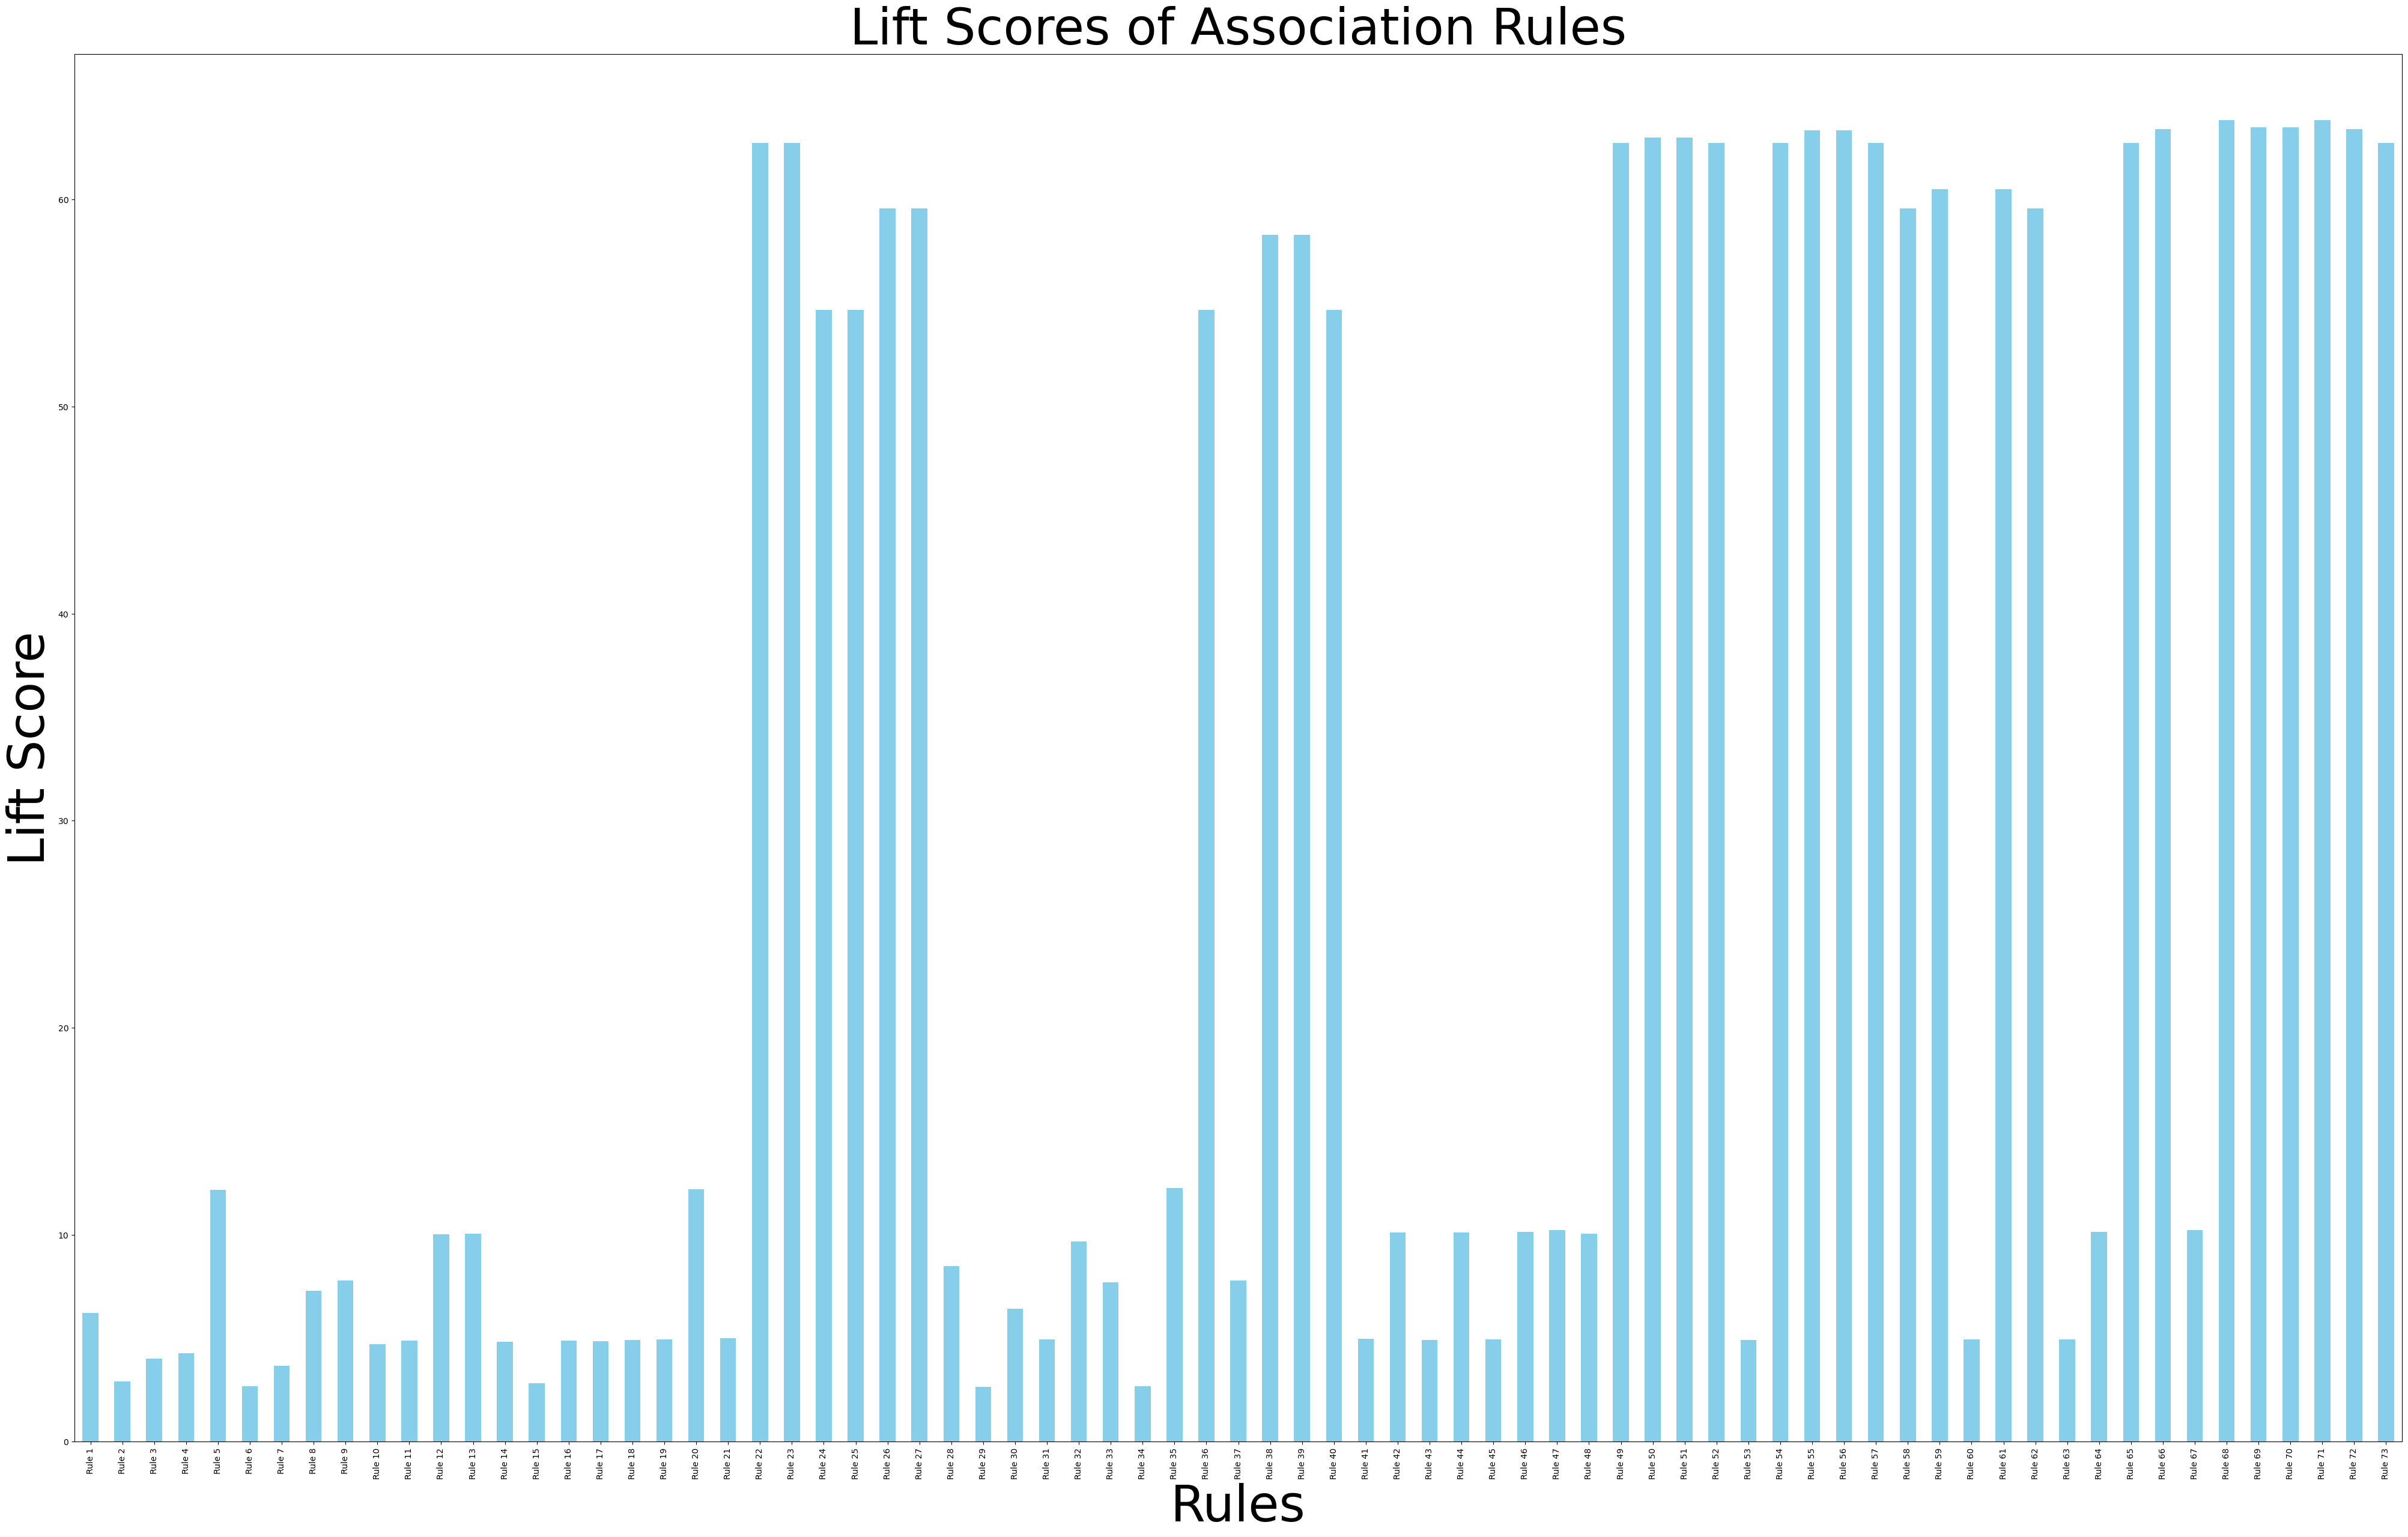

In [5]:
#!pip install mlxtend

import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Load JSON data
with open('../flutter_all_issues.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Preprocess data
transactions = []
for issue in data:
    items = {label['name'] for label in issue.get('labels', [])}  # Safely get all labels
    items.add(issue.get('user', {}).get('login', 'unknown'))  # Safely add author as an item
    transactions.append(list(items))

# Transform transactions into DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Print frequent itemsets
#print(frequent_itemsets)

# Saving Frequent Itemsets to a File
frequent_itemsets.to_csv('frequent_itemsets.csv', index=False)

#Generating and Saving Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence']].to_csv('association_rules.csv', index=False)


# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# print(rules[['antecedents', 'consequents', 'support', 'confidence']])



# Scatter plot for support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, size="lift", alpha=0.6, hue="lift")
plt.title('Association Rules - Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
# Plotting lift scores
plt.figure(figsize=(50, 30))
rules['lift'].plot(kind='bar', color='skyblue')
plt.title('Lift Scores of Association Rules', fontsize=60)
plt.xlabel('Rules', fontsize=60)
plt.ylabel('Lift Score', fontsize=60)
plt.xticks(range(len(rules)), ['Rule {}'.format(i+1) for i in range(len(rules))], rotation=90)

plt.show()

